In [1]:
using Distributions
using RCall
@rlibrary lawstat
using StatsPlots
default(fmt=:png, titlefontsize=10)

In [2]:
probability_that_x_wins_y(x, y) = (x > y) + (x == y)/2

function probability_that_distX_wins_distY(
        distX::DiscreteUnivariateDistribution,
        distY::DiscreteUnivariateDistribution)
    sum(probability_that_x_wins_y(x, y) * pdf(distX, x) * pdf(distY, y)
        for x in support(distX), y in support(distY))
end

probability_that_distX_wins_distY (generic function with 1 method)

probability_that_distX_wins_distY(distA, distB) = 0.5555555555555556
probability_that_distX_wins_distY(distB, distC) = 0.5555555555555556
probability_that_distX_wins_distY(distC, distA) = 0.5555555555555556



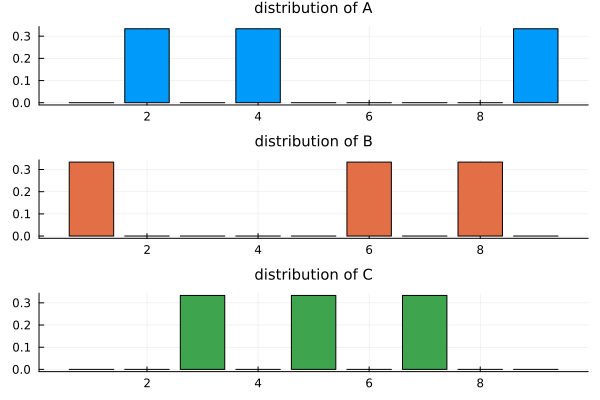

In [3]:
distA = Categorical(0, 1/3, 0, 1/3, 0, 0, 0, 0, 1/3)
distB = Categorical(1/3, 0, 0, 0, 0, 1/3, 0, 1/3, 0)
distC = Categorical(0, 0, 1/3, 0, 1/3, 0, 1/3, 0, 0)

@show probability_that_distX_wins_distY(distA, distB)
@show probability_that_distX_wins_distY(distB, distC)
@show probability_that_distX_wins_distY(distC, distA)
println()

PA = bar(distA; label="", title="distribution of A", c=1)
PB = bar(distB; label="", title="distribution of B", c=2)
PC = bar(distC; label="", title="distribution of C", c=3)
plot(PA, PB, PC; layout=(3, 1))

probability_that_distX_wins_distY(distX, distY) = 0.5555555555555556
probability_that_distX_wins_distY(distY, distZ) = 0.5555555555555556
probability_that_distX_wins_distY(distZ, distX) = 0.5555555555555556



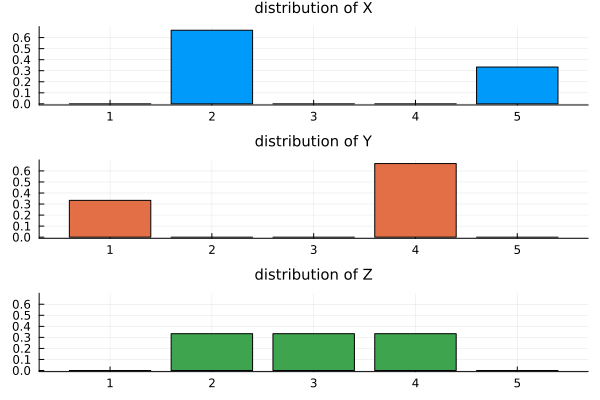

In [4]:
distX = Categorical(0, 2/3, 0, 0, 1/3)
distY = Categorical(1/3, 0, 0, 2/3, 0)
distZ = Categorical(0, 1/3, 1/3, 1/3, 0)

@show probability_that_distX_wins_distY(distX, distY)
@show probability_that_distX_wins_distY(distY, distZ)
@show probability_that_distX_wins_distY(distZ, distX)
println()

PX = bar(distX; label="", title="distribution of X", c=1)
PY = bar(distY; label="", title="distribution of Y", c=2)
PZ = bar(distZ; label="", title="distribution of Z", c=3)
plot(PX, PY, PZ; layout=(3, 1), ylim=(-0.01, 0.7))

In [5]:
n = 10^4
X = rand(distX, n)
Y = rand(distY, n)
Z = rand(distZ, n)
@rput X Y Z;

In [6]:
brunner_munzel_test(Y, X) |> rcopy

OrderedCollections.OrderedDict{Symbol, Any} with 7 entries:
  :estimate  => 0.556725
  :conf_int  => [0.548018, 0.565431]
  :statistic => 12.7706
  :parameter => 19992.2
  :p_value   => 0.0
  :method    => "Brunner-Munzel Test"
  :data_name => ["c(4L, 4L, 4L, 4L, 4L, 1L, 1L, 4L, 1L, 4L, 4L, 4L, 4L, 4L, 1L,…

In [7]:
brunner_munzel_test(Z, Y) |> rcopy

OrderedCollections.OrderedDict{Symbol, Any} with 7 entries:
  :estimate  => 0.551479
  :conf_int  => [0.543171, 0.559788]
  :statistic => 12.145
  :parameter => 13061.8
  :p_value   => 0.0
  :method    => "Brunner-Munzel Test"
  :data_name => ["c(2L, 3L, 4L, 2L, 4L, 2L, 4L, 3L, 2L, 3L, 3L, 2L, 2L, 4L, 3L,…

In [8]:
brunner_munzel_test(X, Z) |> rcopy

OrderedCollections.OrderedDict{Symbol, Any} with 7 entries:
  :estimate  => 0.557509
  :conf_int  => [0.549231, 0.565787]
  :statistic => 13.6177
  :parameter => 13170.1
  :p_value   => 0.0
  :method    => "Brunner-Munzel Test"
  :data_name => ["c(2L, 2L, 2L, 2L, 5L, 2L, 2L, 2L, 2L, 2L, 5L, 2L, 2L, 5L, 5L,…

probability_that_distX_wins_distY(distX, distY) = 0.5694444444444444
probability_that_distX_wins_distY(distY, distZ) = 0.5416666666666666
probability_that_distX_wins_distY(distZ, distX) = 0.5416666666666666



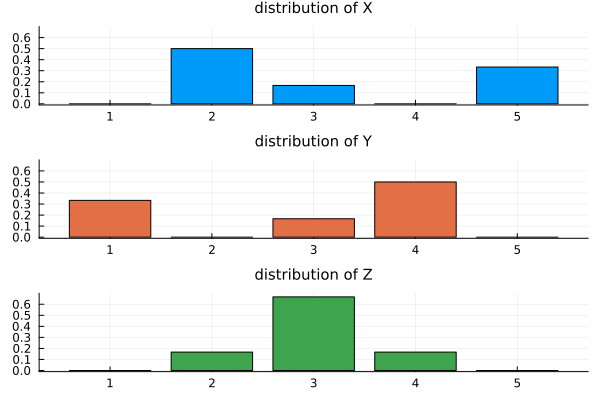

In [9]:
distX = Categorical(0, 1/2, 1/6, 0, 1/3)
distY = Categorical(1/3, 0, 1/6, 1/2, 0)
distZ = Categorical(0, 1/6, 2/3, 1/6, 0)

@show probability_that_distX_wins_distY(distX, distY)
@show probability_that_distX_wins_distY(distY, distZ)
@show probability_that_distX_wins_distY(distZ, distX)
println()

PX = bar(distX; label="", title="distribution of X", c=1)
PY = bar(distY; label="", title="distribution of Y", c=2)
PZ = bar(distZ; label="", title="distribution of Z", c=3)
plot(PX, PY, PZ; layout=(3, 1), ylim=(-0.01, 0.7))